In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#2. Import Data
df = pd.read_csv("dataset/Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
#3. Inspect Data
#3a. Menampilkan nama kolom
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [4]:
#3. Inspect Data
#3b. mendeteksi kolom duplikasi
df.duplicated().sum()

np.int64(0)

In [5]:
#4. Cari Missing Value
#4a. Melihat missing value
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
num_cols = df.select_dtypes(include='number').columns

In [8]:
#3. Inspect Data
#3d. mendeskripsikan data numerik
round(df.describe(), 2)

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,883.00,883.00,883.00,883.00,883.00
mean,508.11,10.05,17.02,4.64,56.43
std,287.93,5.69,7.26,2.92,21.57
min,1.00,0.59,5.00,0.00,8.00
25%,263.50,5.13,11.00,2.00,41.00
50%,512.00,10.28,17.00,5.00,55.00
75%,758.50,15.02,23.00,7.00,71.00
max,1000.00,19.99,29.00,9.00,141.00


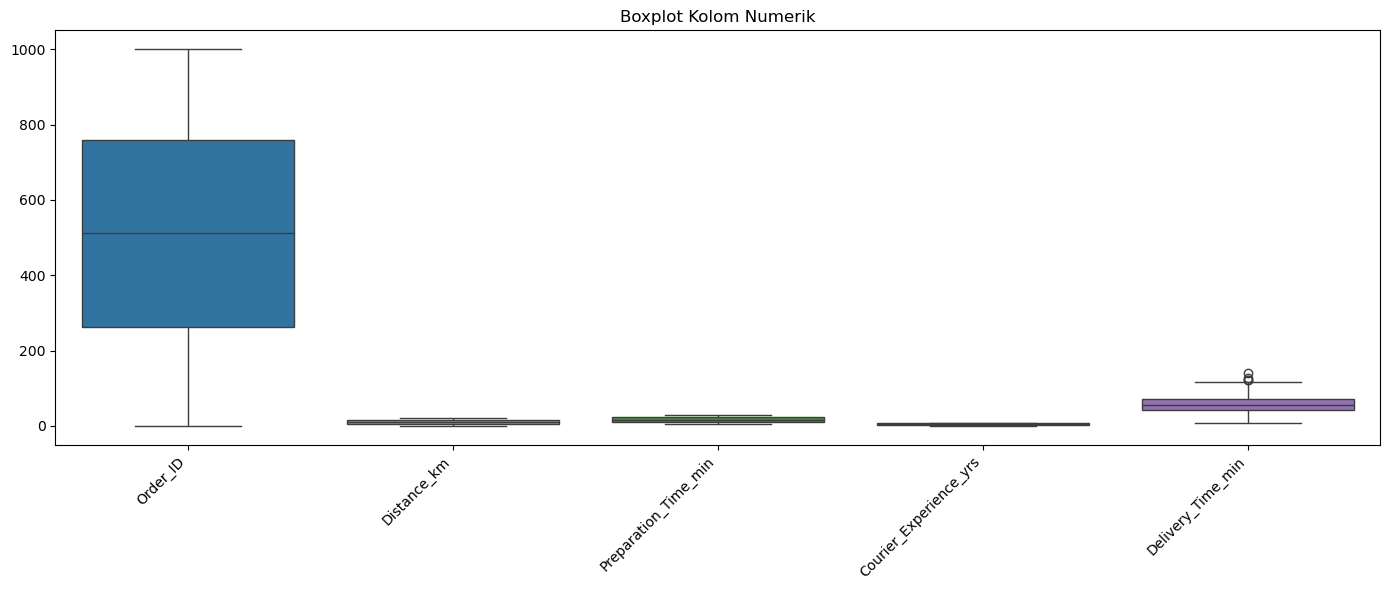

In [9]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45, ha="right")
plt.title("Boxplot Kolom Numerik")
plt.tight_layout()
plt.show()

In [10]:
#Hitung Q1, Q3 dan IQR untuk kolom numerik
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1


#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

#Filter baris oulier
df_outliers = df[((df[num_cols] < lower_bound)| (df[num_cols] > upper_bound)).any(axis=1)]
print("Data Outlier :", df_outliers.shape[0], "baris") 

Data Outlier : 4 baris


In [11]:
#6. Outlier
#Ambil baris yang tidak memiliki outliers
df_no_outliers = df[~((df[num_cols] < lower_bound)| (df[num_cols] > upper_bound)).any(axis=1)]
print("Data sebelum : ", df.shape[0], "baris") 
print("Data sesudah : ", df_no_outliers.shape[0], "baris") 

Data sebelum :  883 baris
Data sesudah :  879 baris


In [12]:
df = df_no_outliers.copy()
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [13]:
df.to_excel("dataset/Food_Delivery_Cleaned.xlsx", index = False)

In [14]:
df.to_csv("dataset/Food_Delivery_Cleaned.csv", index=False)

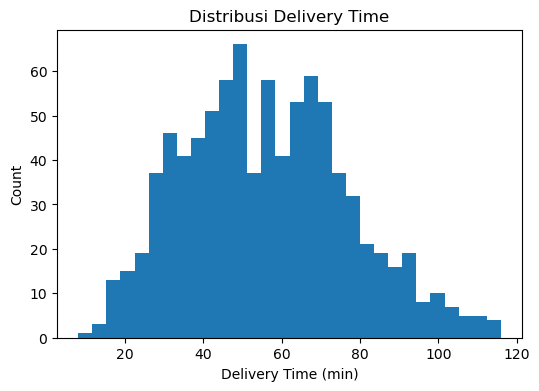

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df['Delivery_Time_min'], bins=30)
plt.title("Distribusi Delivery Time")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Count")
plt.show()

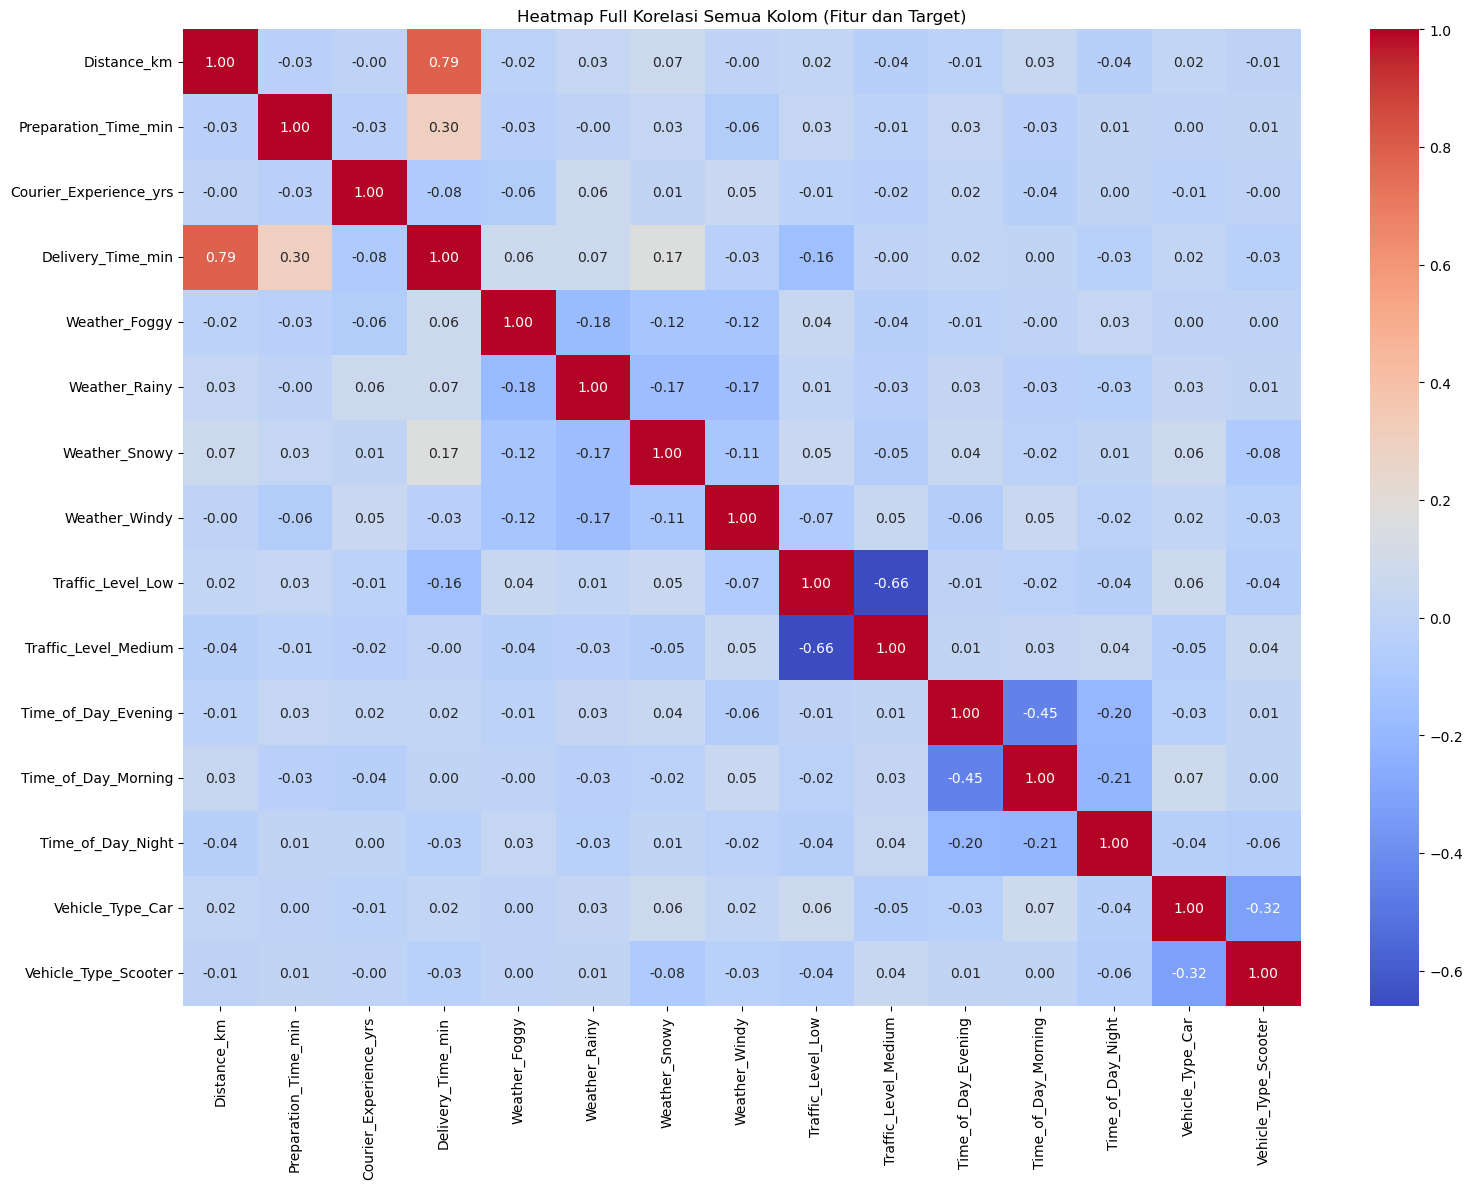

In [16]:
df_encoded = df.drop(columns=["Order_ID"], errors="ignore").copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded = df_encoded.apply(pd.to_numeric, errors="coerce").astype(float)

plt.figure(figsize=(16,12))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Full Korelasi Semua Kolom (Fitur dan Target)")
plt.tight_layout()
plt.show()

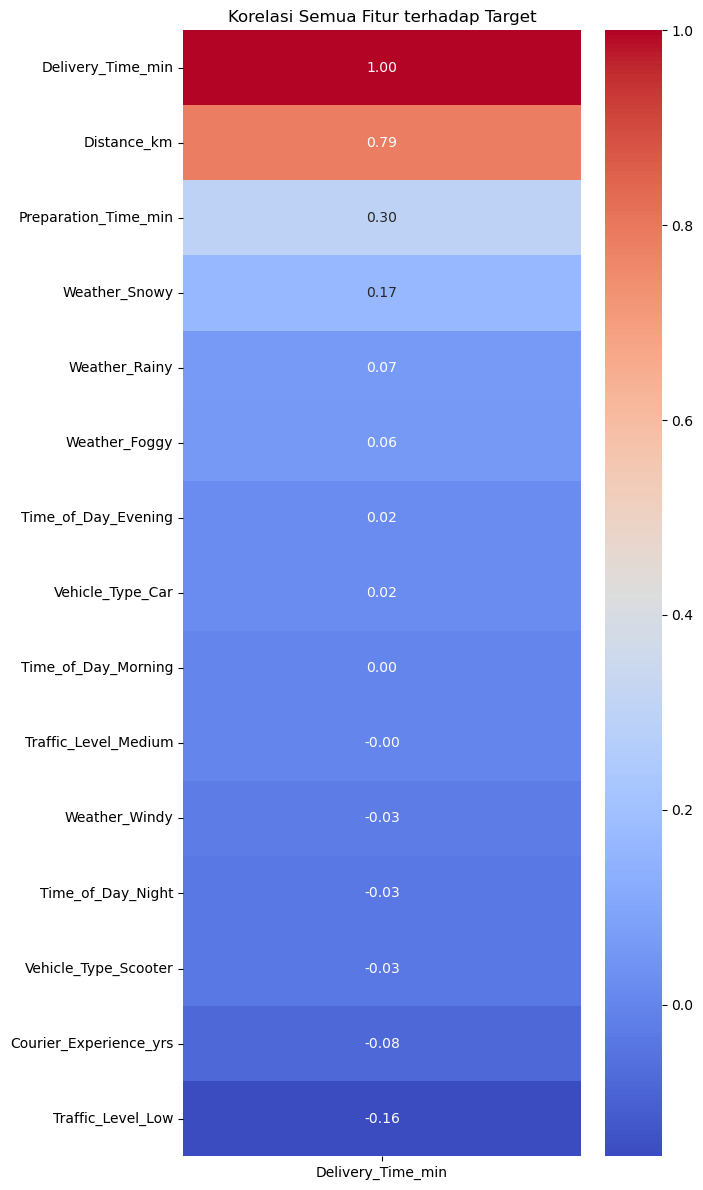

In [17]:
df_encoded = df.drop(columns=["Order_ID"], errors="ignore").copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded = df_encoded.apply(pd.to_numeric, errors="coerce").astype(float)

corr_target = df_encoded.corr()[["Delivery_Time_min"]].sort_values(by="Delivery_Time_min", ascending=False)

plt.figure(figsize=(7,12))
sns.heatmap(corr_target, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Semua Fitur terhadap Target")
plt.tight_layout()
plt.show()

In [18]:
# 1) ambil X
X = df.drop(columns=["Delivery_Time_min", "Order_ID"], errors="ignore").copy()

# 2) encoding (otomatis jadi 0/1 untuk kategori)
X = pd.get_dummies(X, drop_first=True)

# 3) paksa semua jadi angka float
X = X.apply(pd.to_numeric, errors="coerce").astype(float)

# 6) hitung VIF (tanpa const)
vif = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)

vif

,Feature,VIF
1,Preparation_Time_min,4.742697
0,Distance_km,3.489227
2,Courier_Experience_yrs,3.056185
8,Traffic_Level_Medium,2.476585
7,Traffic_Level_Low,2.459961
10,Time_of_Day_Morning,1.931146
9,Time_of_Day_Evening,1.889989
13,Vehicle_Type_Scooter,1.536723
4,Weather_Rainy,1.425995
12,Vehicle_Type_Car,1.371654


In [19]:
#memisahkan variabel bebas (X) dan terikat (y)
y = df['Delivery_Time_min']

In [20]:
cat_cols = X.select_dtypes(exclude='number').columns
num_cols = X.select_dtypes(include='number').columns

In [21]:
X.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.42,20.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,9.52,28.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7.44,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,19.03,16.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Jumlah X_train =', len(X_train))
print('Jumlah X_test =', len(X_test))

Jumlah X_train = 703
Jumlah X_test = 176


In [23]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# melihat intercept
print("Intercept:", round(model.intercept_, 3))

# melihat koefisien tiap fitur
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coef_df

Intercept: 18.598


,Feature,Coefficient
0,Distance_km,2.940204
1,Preparation_Time_min,0.907368
2,Courier_Experience_yrs,-0.483479
3,Weather_Foggy,8.185599
4,Weather_Rainy,5.209277
5,Weather_Snowy,9.268322
6,Weather_Windy,2.077835
7,Traffic_Level_Low,-13.051127
8,Traffic_Level_Medium,-6.010878
9,Time_of_Day_Evening,-0.023569


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("R2:", r2)

MAE : 5.971175049518621
MAPE: 10.14217179548155 %
RMSE: 9.404316496483315
R2: 0.7949304350064604


In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

#Pada Ridge
ridge = Ridge()
alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(2.976351441631316)}
Best score: -91.77421009774594


In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Pada Lasso
lasso = Lasso()

alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(lasso, param_grid, cv=5,scoring='neg_mean_squared_error')

grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(0.07847599703514611)}
Best score: -91.46995664389509


In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2.976)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=2.976)

In [30]:
# Melihat koefisien masing-masing fitur
coef_df_ridge = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge.coef_
})
# Melihat nilai intercept
print("Intercept Ridge:", round((ridge.intercept_), 4))

coef_df_ridge

Intercept Ridge: 55.8023


,feature,coefficient
0,Distance_km,16.557087
1,Preparation_Time_min,6.575889
2,Courier_Experience_yrs,-1.379579
3,Weather_Foggy,2.566019
4,Weather_Rainy,2.152862
5,Weather_Snowy,2.729735
6,Weather_Windy,0.589201
7,Traffic_Level_Low,-6.270556
8,Traffic_Level_Medium,-2.911847
9,Time_of_Day_Evening,-0.006573


In [31]:
# Prediksi
y_pred_ridge = ridge.predict(X_test_scaled)

# MAE
mae_ridge = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_ridge = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_ridge = ridge.score(X_test_scaled, y_test)

print("MAE :", mae_ridge)
print("MAPE:", mape_ridge, "%")
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)

MAE : 5.971175049518621
MAPE: 10.14217179548155 %
RMSE: 9.404316496483315
R2: 0.7952664101462572


In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.078)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.078)

In [33]:
# Melihat koefisien masing-masing fitur
coef_df_lasso = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso.coef_
})
# Melihat nilai intercept
print("Intercept Lasso:", round((lasso.intercept_), 4))

coef_df_lasso

Intercept Lasso: 55.8023


,feature,coefficient
0,Distance_km,16.559241
1,Preparation_Time_min,6.521597
2,Courier_Experience_yrs,-1.296455
3,Weather_Foggy,2.451017
4,Weather_Rainy,2.027234
5,Weather_Snowy,2.624792
6,Weather_Windy,0.472089
7,Traffic_Level_Low,-6.089470
8,Traffic_Level_Medium,-2.752126
9,Time_of_Day_Evening,0.000000


In [34]:
# Prediksi
y_pred_lasso = lasso.predict(X_test_scaled)

# MAE
mae_lasso = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_lasso = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_lasso = lasso.score(X_test_scaled, y_test)

print("MAE :", mae_lasso)
print("MAPE:", mape_lasso, "%")
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)

MAE : 5.971175049518621
MAPE: 10.14217179548155 %
RMSE: 9.404316496483315
R2: 0.7954052301603598


In [35]:
#Prediksi dengan model terbaik
y_pred = model.predict(X_test)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

#Evaluasi Linear Regression
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#Evaluasi Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = ridge.score(X_test_scaled, y_test)

#Evaluasi Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = lasso.score(X_test_scaled, y_test)

#Hasil
eval_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso"],
    'Best Alpha' : ['Tidak perlu', '2.976', '0.078'],
    "MAE": [mae, mae_ridge, mae_lasso],
    "MAPE (%)": [mape, mape_ridge, mape_lasso],
    "RMSE": [rmse, rmse_ridge, rmse_lasso],
    "R2" : [r2, r2_ridge, r2_lasso]
})

eval_df

,Model,Best Alpha,MAE,MAPE (%),RMSE,R2
0,Linear Regression,Tidak perlu,5.971175,10.142172,9.404316,0.794930
1,Ridge,2.976,5.969176,10.161731,9.396610,0.795266
2,Lasso,0.078,5.958090,10.148671,9.393423,0.795405
